# IMPORT GLOBALES

In [2]:
import pandas as pd
import numpy as np
import  requests
import io
from matplotlib import pyplot as plt
import seaborn as sns

# VARIABLES GLOBALES

In [7]:
API_KEY="knB7BNTx60qIkkY21f3ggiqzZhFJruKA27aPjYGO"

#LECTURA DE ARCHIVOS

In [8]:
def get_api_df(dataset):
  url = f"https://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{dataset}/data.csv/?auth_key={API_KEY}"

  return pd.read_csv(url, encoding="utf-8")

In [9]:
DATASET="LISTA-DE-LOCAL-CON-CONEC"
df_local= get_api_df(DATASET)

In [10]:
df_local

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,SI,SI,SI,SI,SI,SI,SI,SI,SI
4307,BUENOS AIRES,Pilar,Presidente Derqui,SI,SI,--,SI,SI,SI,SI,SI,--
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,--,--,--,--,SI,SI,--,--,--
4309,BUENOS AIRES,Pilar,Santa Teresa,--,--,--,--,SI,SI,--,--,SI


# ANALISIS LOCALIDADES, PARTIDOS Y PROVINCIAS

## ANALISIS GENERAL

In [146]:
df_local.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


In [147]:
df_local.columns

Index(['Provincia', 'Partido', 'Localidad', 'ADSL', 'Cablemódem', 'Dial Up',
       'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital'],
      dtype='object')

In [148]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


In [149]:
df_local.describe()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
count,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,84,12,3182,3448,3908,2784,2574,2431,2243,2224,3248


## TRATAMIENTO DE DATOS NULOS

In [150]:
df_local.isnull().sum()

Provincia         0
Partido           0
Localidad         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
4G                0
3G                0
Telefonía Fija    0
Wireless          0
Satelital         0
dtype: int64

In [151]:
df_local["ADSL"].unique().tolist()

['SI', '--']

## FORMATEO DE DATOS

In [152]:
df_local_bool=df_local.copy()

In [153]:
df_local_bool = df_local_bool.applymap(lambda x: True if x in "SI" else x)

In [154]:
def replace_value(x):
    if isinstance(x, str) and x == "--":
        return False
    return x

df_local_bool = df_local_bool.applymap(replace_value)

In [155]:
df_local_bool["Provincia"].astype("category")
df_local_bool["Partido"].astype("category")
df_local_bool["Localidad"].astype("category")

0       Alfredo Demarchi (Est. Facundo Quiroga)
1                             Carlos María Naón
2                                      Dudignac
3                      La Aurora (Est. La Niña)
4                Manuel B. Gonnet (Est. French)
                         ...                   
4306                                      Pilar
4307                          Presidente Derqui
4308                         Roberto De Vicenzo
4309                               Santa Teresa
4310                                Tortuguitas
Name: Localidad, Length: 4311, dtype: category
Categories (3912, object): ['1 De Agosto', '11 De Septiembre', '11 de Octubre', '12 de Octubre', ...,
                            'Ñancay', 'Ñanducita', 'Ñirihuau', 'Ñorquincó']

In [156]:
df_local_bool

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),True,False,False,False,True,True,True,False,False
1,BUENOS AIRES,9 de Julio,Carlos María Naón,False,False,False,False,True,True,True,False,False
2,BUENOS AIRES,9 de Julio,Dudignac,False,False,True,False,True,True,True,True,False
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),False,False,False,False,True,False,False,False,False
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),True,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,True,True,True,True,True,True,True,True,True
4307,BUENOS AIRES,Pilar,Presidente Derqui,True,True,False,True,True,True,True,True,False
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,False,False,False,False,True,True,False,False,False
4309,BUENOS AIRES,Pilar,Santa Teresa,False,False,False,False,True,True,False,False,True


In [157]:
df_local_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   bool  
 4   Cablemódem      4311 non-null   bool  
 5   Dial Up         4311 non-null   bool  
 6   Fibra óptica    4311 non-null   bool  
 7   4G              4311 non-null   bool  
 8   3G              4311 non-null   bool  
 9   Telefonía Fija  4311 non-null   bool  
 10  Wireless        4311 non-null   bool  
 11  Satelital       4311 non-null   bool  
dtypes: bool(9), object(3)
memory usage: 139.1+ KB


In [158]:
df_local_bool.describe()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
count,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,False,False,False,False,True,False,True,True,False
freq,901,84,12,3182,3448,3908,2784,2574,2431,2243,2224,3248


## GRAFICOS

In [159]:
df_local_bool

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),True,False,False,False,True,True,True,False,False
1,BUENOS AIRES,9 de Julio,Carlos María Naón,False,False,False,False,True,True,True,False,False
2,BUENOS AIRES,9 de Julio,Dudignac,False,False,True,False,True,True,True,True,False
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),False,False,False,False,True,False,False,False,False
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),True,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,True,True,True,True,True,True,True,True,True
4307,BUENOS AIRES,Pilar,Presidente Derqui,True,True,False,True,True,True,True,True,False
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,False,False,False,False,True,True,False,False,False
4309,BUENOS AIRES,Pilar,Santa Teresa,False,False,False,False,True,True,False,False,True


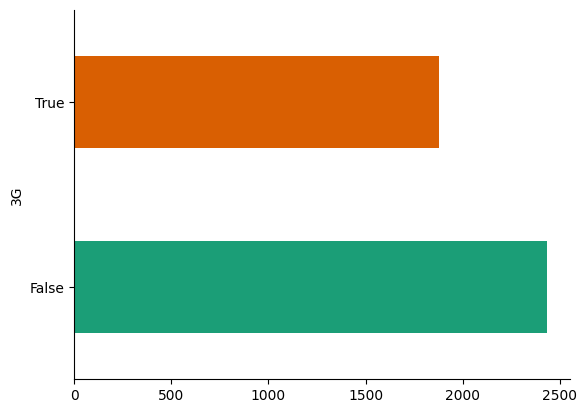

In [160]:
df_local_bool.groupby('3G').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

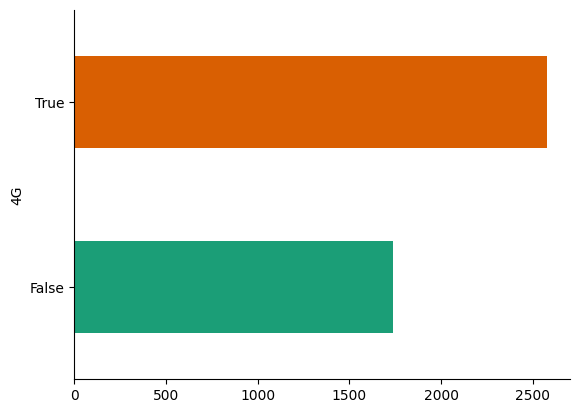

In [161]:
df_local_bool.groupby('4G').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

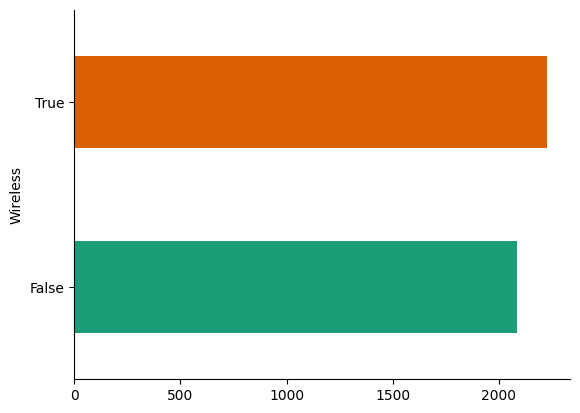

In [162]:
df_local_bool.groupby('Wireless').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

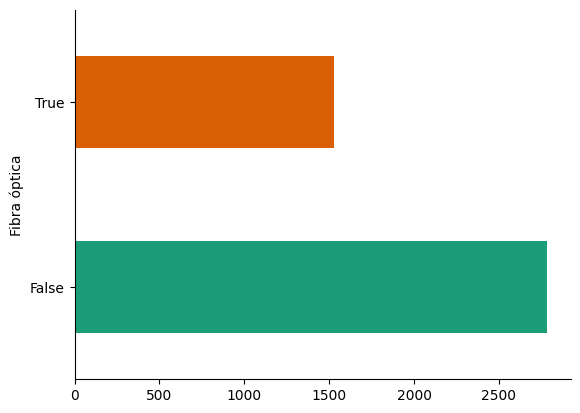

In [163]:
df_local_bool.groupby('Fibra óptica').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

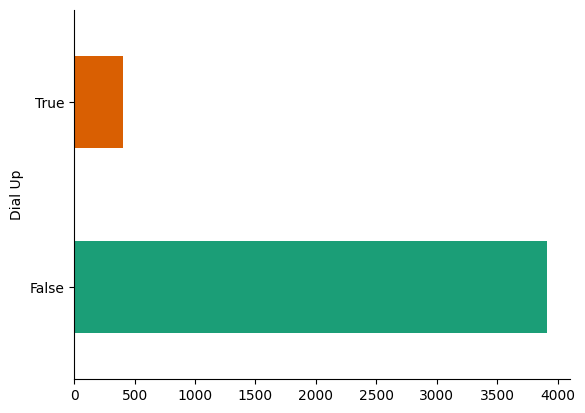

In [164]:
df_local_bool.groupby('Dial Up').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

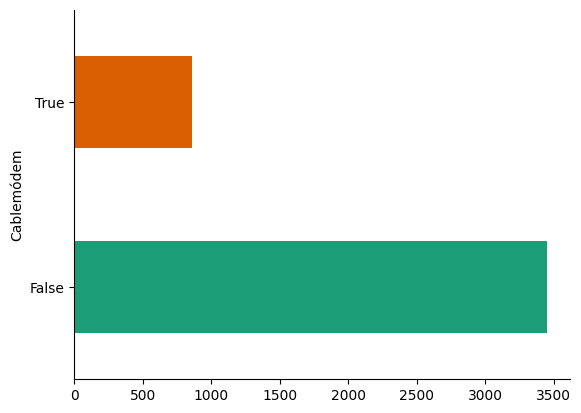

In [165]:
df_local_bool.groupby('Cablemódem').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

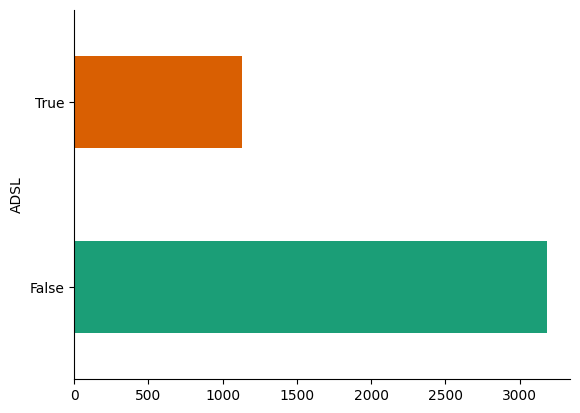

In [166]:
df_local_bool.groupby('ADSL').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-167-3d94f29dea09>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_local_bool.groupby('Provincia').sum()


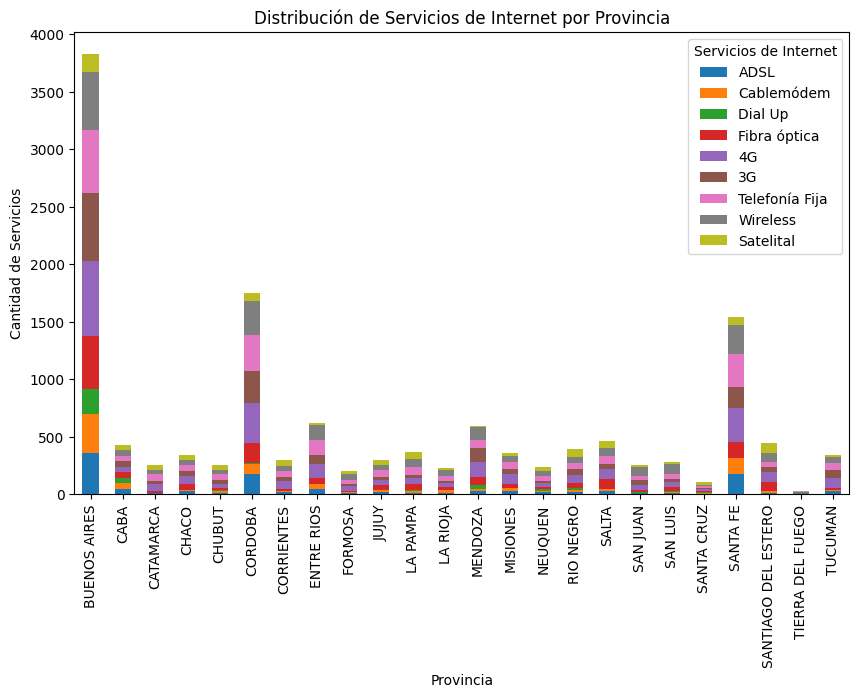

In [167]:
grouped = df_local_bool.groupby('Provincia').sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Servicios de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Servicios')
plt.legend(title='Servicios de Internet')
plt.show()

# EXTRACCION DE DATOS POR PROVINCIAS

In [169]:
df_provicial = df_local_bool.copy()

In [170]:
df_provicial

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),True,False,False,False,True,True,True,False,False
1,BUENOS AIRES,9 de Julio,Carlos María Naón,False,False,False,False,True,True,True,False,False
2,BUENOS AIRES,9 de Julio,Dudignac,False,False,True,False,True,True,True,True,False
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),False,False,False,False,True,False,False,False,False
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),True,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,True,True,True,True,True,True,True,True,True
4307,BUENOS AIRES,Pilar,Presidente Derqui,True,True,False,True,True,True,True,True,False
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,False,False,False,False,True,True,False,False,False
4309,BUENOS AIRES,Pilar,Santa Teresa,False,False,False,False,True,True,False,False,True


In [171]:
df_provicial.columns

Index(['Provincia', 'Partido', 'Localidad', 'ADSL', 'Cablemódem', 'Dial Up',
       'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital'],
      dtype='object')

In [172]:
df_provicial=df_provicial.drop("Partido",axis=1)
df_provicial=df_provicial.drop("Localidad", axis=1)

In [173]:
df_provicial.columns

Index(['Provincia', 'ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G',
       '3G', 'Telefonía Fija', 'Wireless', 'Satelital'],
      dtype='object')

# EXPORTAR DATOS

In [174]:
df_provicial.to_csv("data/servicios_provinciales.csv", index=False)

# ANALISIS BANDA ANCHA Y BANDA ANGOSTA

## ANALISIS GENERAL

In [175]:
DATASET_BANDA="BANDA-ANCHA-Y-BANDA-ANGOS"
df_banda= get_api_df(DATASET_BANDA)

In [176]:
df_banda

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28


In [177]:
df_banda.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [178]:
df_banda.columns

Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')

In [179]:
df_banda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [180]:
df_banda.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


## TRATAMIENTO DE DATOS NULOS

In [181]:
df_banda_clear= df_banda.copy()

In [182]:
df_banda_clear= df_banda_clear.drop("Total", axis=1)

In [183]:
df_banda_clear.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
dtype: int64

## GRAFICOS

In [184]:
df_banda_clear

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
0,2022,4,Buenos Aires,5,6.0
1,2022,4,Capital Federal,2,2.0
2,2022,4,Catamarca,71,1.0
3,2022,4,Chaco,144,5.0
4,2022,4,Chubut,168,904.0
...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0
860,2014,1,Santa Fe,506,612.0
861,2014,1,Santiago Del Estero,37,9.0
862,2014,1,Tierra Del Fuego,27,766.0


In [185]:
selected_columns = df_banda_clear[['Provincia', 'Banda ancha fija','Dial up']]

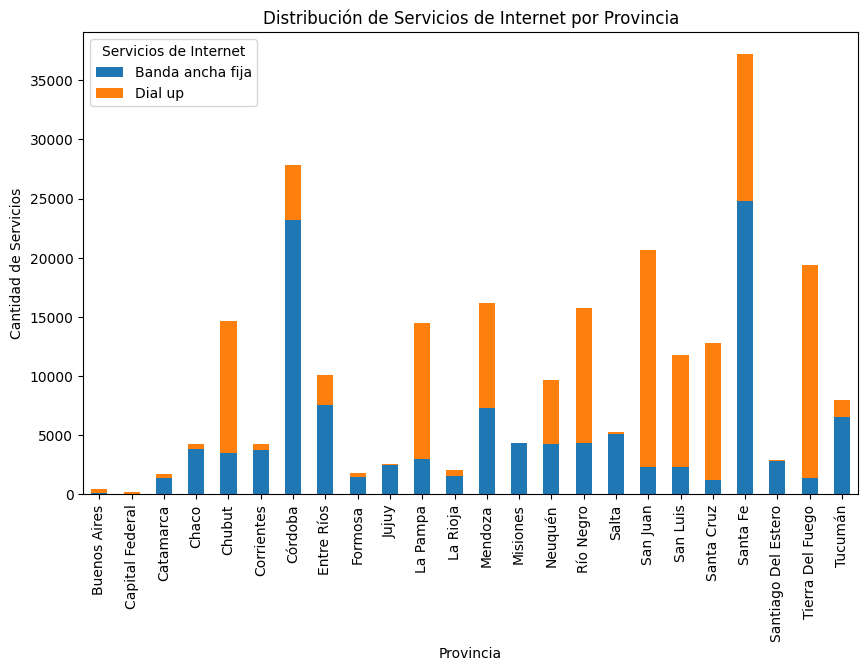

In [186]:
grouped = selected_columns.groupby('Provincia').sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Servicios de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Servicios')
plt.legend(title='Servicios de Internet')
plt.show()

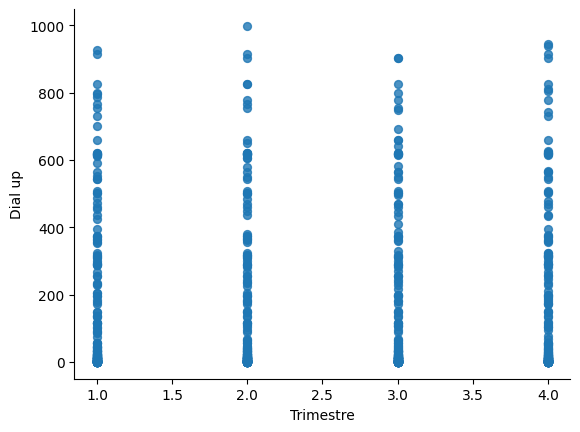

In [187]:
from matplotlib import pyplot as plt
df_banda_clear.plot(kind='scatter', x='Trimestre', y='Dial up', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

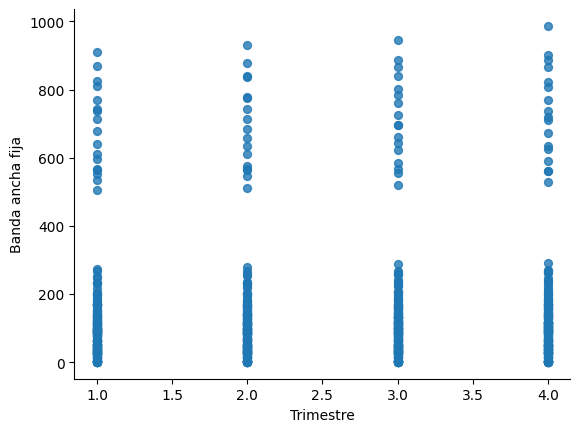

In [188]:
from matplotlib import pyplot as plt
df_banda_clear.plot(kind='scatter', x='Trimestre', y='Banda ancha fija', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

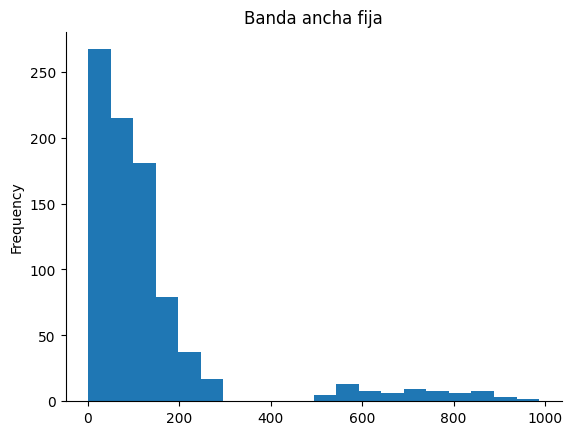

In [189]:
from matplotlib import pyplot as plt
df_banda_clear['Banda ancha fija'].plot(kind='hist', bins=20, title='Banda ancha fija')
plt.gca().spines[['top', 'right',]].set_visible(False)

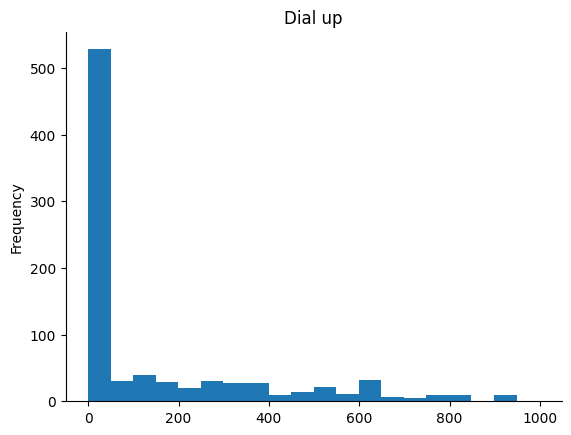

In [190]:
from matplotlib import pyplot as plt
df_banda_clear['Dial up'].plot(kind='hist', bins=20, title='Dial up')
plt.gca().spines[['top', 'right',]].set_visible(False)

# EXTRACCION DE DATOS POR PROVINCIAS

In [191]:
df_prov = df_banda_clear.copy()

In [192]:
df_prov

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
0,2022,4,Buenos Aires,5,6.0
1,2022,4,Capital Federal,2,2.0
2,2022,4,Catamarca,71,1.0
3,2022,4,Chaco,144,5.0
4,2022,4,Chubut,168,904.0
...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0
860,2014,1,Santa Fe,506,612.0
861,2014,1,Santiago Del Estero,37,9.0
862,2014,1,Tierra Del Fuego,27,766.0


# EXPORTAR DATOS

In [193]:
df_prov.to_csv("data/bandas_provinciales.csv", index=False)

# ANALISIS ACCESOS POR TECNOLOGIA

## ANALISIS GENERAL

In [14]:
DATASET_TRIME="data/Internet_BAF.csv"

In [17]:
df_trime = pd.read_csv(DATASET_TRIME)

In [197]:
df_trime

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021
5,2021,3,2,6,2,492,250,10,Jul-Sept 2021
6,2021,2,2,6,1,477,254,10,Abr-Jun 2021
7,2021,1,2,5,1,435,250,10,Ene-Mar 2021
8,2020,4,2,5,1,422,253,10,Oct-Dic 2020
9,2020,3,2,5,1,413,249,9,Jul-Sept 2020


In [198]:
df_trime.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021


In [199]:
df_trime.columns

Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')

In [200]:
df_trime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


In [201]:
df_trime.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,3.083333,4.166667,193.361111,257.222222,149.500000,8.361111
std,2.618615,1.133893,1.079021,1.253566,239.714968,180.185319,85.497034,1.495761
min,2014.000000,1.000000,1.000000,2.000000,1.000000,71.000000,54.000000,6.000000
25%,2016.000000,1.750000,2.000000,3.000000,2.750000,85.000000,64.250000,7.000000
50%,2018.000000,2.500000,4.000000,4.000000,159.000000,220.000000,116.500000,8.000000
75%,2020.000000,3.250000,4.000000,5.000000,198.250000,415.250000,247.500000,9.250000
max,2022.000000,4.000000,4.000000,6.000000,941.000000,573.000000,265.000000,11.000000


## TRATAMIENTO DE DATOS NULOS

In [202]:
df_trime_clear= df_trime.copy()

In [203]:
df_trime_clear= df_trime_clear.drop("Total", axis=1)
df_trime_clear= df_trime_clear.drop("Periodo", axis=1)

In [204]:
df_trime_clear= df_trime_clear.drop("Otros", axis=1)

In [205]:
df_trime_clear.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
dtype: int64

## GRAFICOS

In [206]:
df_trime_clear

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless
0,2022,4,1,6,3,573
1,2022,3,1,6,3,557
2,2022,2,1,6,3,556
3,2022,1,2,6,2,546
4,2021,4,2,6,2,523
5,2021,3,2,6,2,492
6,2021,2,2,6,1,477
7,2021,1,2,5,1,435
8,2020,4,2,5,1,422
9,2020,3,2,5,1,413


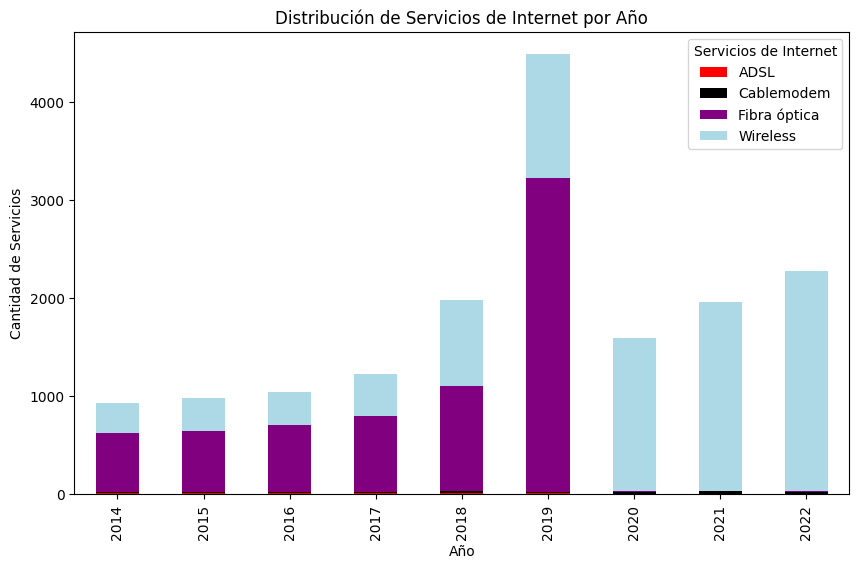

In [207]:
selected_columns = df_trime_clear[['Año', 'ADSL','Cablemodem', 'Fibra óptica', 'Wireless']]
grouped = selected_columns.groupby('Año').sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6),color=["red","black","purple","lightblue"])
plt.title('Distribución de Servicios de Internet por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Servicios')
plt.legend(title='Servicios de Internet')
plt.show()

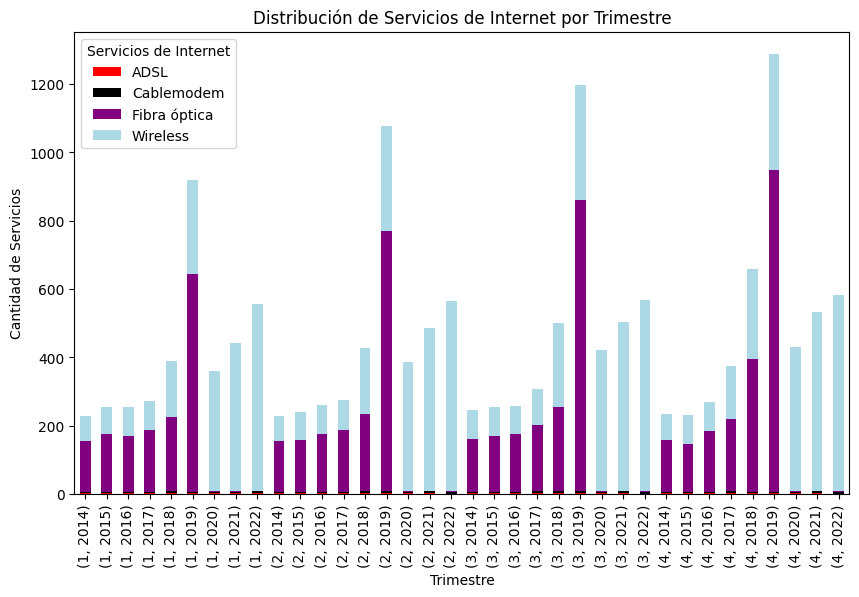

In [208]:
selected_columns = df_trime_clear[['Año','Trimestre', 'ADSL','Cablemodem', 'Fibra óptica', 'Wireless']]
grouped = selected_columns.groupby(['Trimestre',"Año"]).sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6),color=["red","black","purple","lightblue"])
plt.title('Distribución de Servicios de Internet por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de Servicios')
plt.legend(title='Servicios de Internet')
plt.show()

In [209]:
df_ff= df_trime_clear.copy()

# EXPORTAR DATOS

In [210]:
df_ff.to_csv("data/bandas_no_prov.csv", index=False)